# 2-2. 프로젝트 2: 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## (1) 데이터 가져오기

In [2]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
display(train.head())

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [3]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print(train.shape)
display(train.head())

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

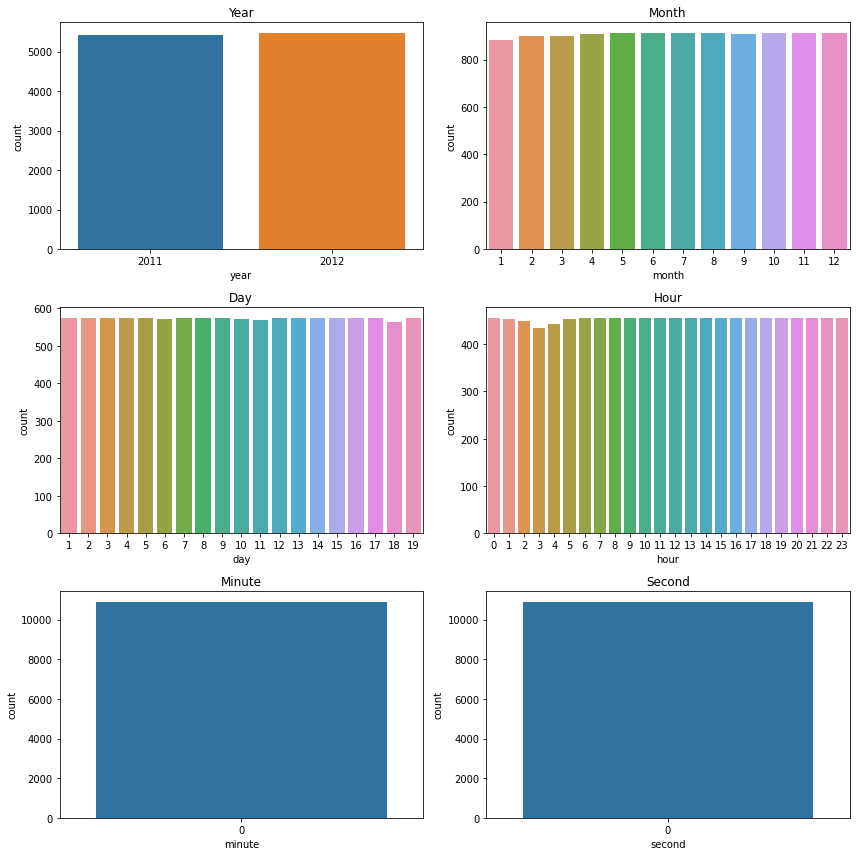

In [4]:
fig, axes = plt.subplots(3, 2, figsize = (12, 12))

sns.countplot(x = 'year', data = train, ax = axes[0, 0])
axes[0, 0].set_title('Year')

sns.countplot(x = 'month', data = train, ax = axes[0, 1])
axes[0, 1].set_title('Month')

sns.countplot(x = 'day', data = train, ax = axes[1, 0])
axes[1, 0].set_title('Day')

sns.countplot(x = 'hour', data = train, ax = axes[1, 1])
axes[1, 1].set_title('Hour')

sns.countplot(x = 'minute', data = train, ax = axes[2, 0])
axes[2, 0].set_title('Minute')

sns.countplot(x = 'second', data = train, ax = axes[2, 1])
axes[2, 1].set_title('Second')

plt.tight_layout()
plt.show()

1시간 마다 측정되는 데이터라서 min, sec는 한 가지 데이터만 있음.

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

노드에 train, test 분류만 하라고 적혀있어서 val을 뺌.

In [5]:
print(train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


새로 생성한 데이터가 있어서 datetime 삭제<br>
casual, registered 삭제<br>
count 삭제<br>

In [6]:
X = train.drop(columns = ['datetime', 'casual', 'registered', 'count'])
y = train['count']
display(X.head())
display(y.head())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

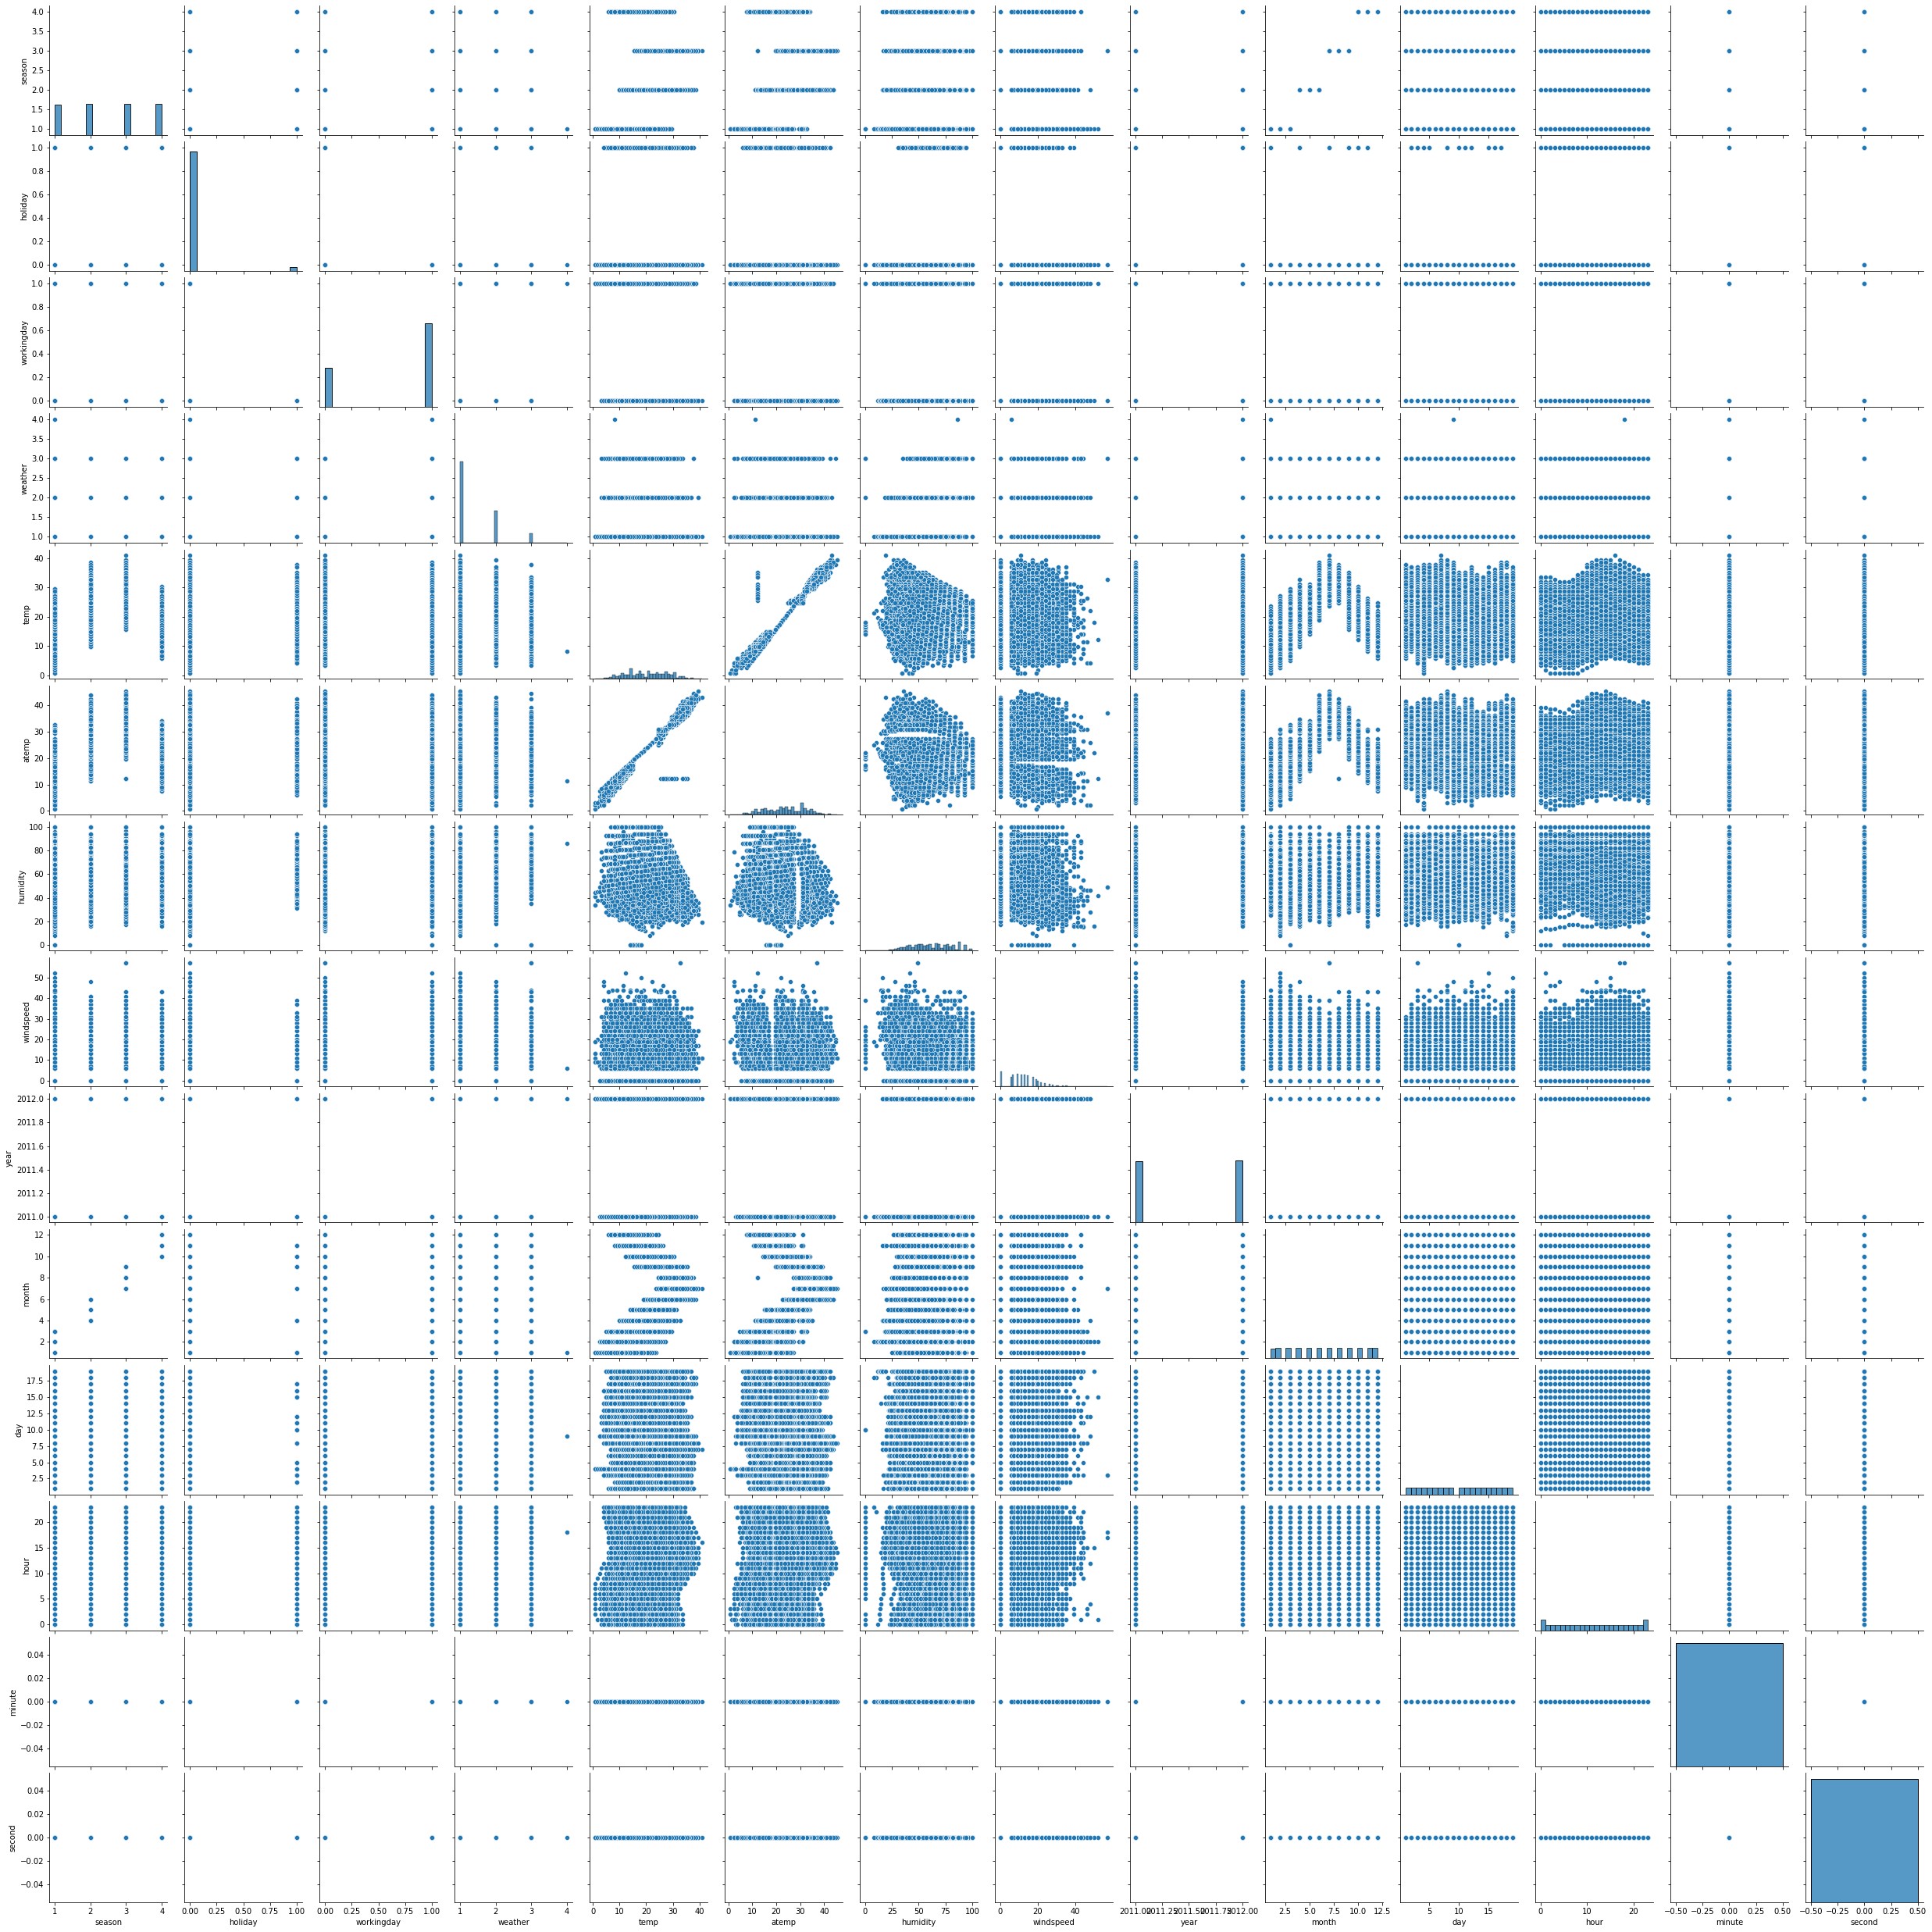

In [7]:
sns.pairplot(X)
plt.show()

In [8]:
print(X.corr())

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
year       -0.004797  0.012021   -0.002482 -0.012548  0.061226  0.058540   
month       0.971524  0.001731   -0.003394  0.012144  0.257589  0.264173   
day         0.001729 -0.015877    0.009829 -0.007890  0.015551  0.011866   
hour       -0.006546 -0.000354    0.002780 -0.022740  0.145430  0.140343   
minute      

강한 상관이 있는 temp와 atemp 중 temp만 사용하고 atemp 삭제<br>
min, sec는 0값밖에 없어서 계산할 수 없음.

In [9]:
X.drop(columns = 'atemp', inplace = True)
display(X.head())

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,0,1,9.84,81,0.0,2011,1,1,0,0,0
1,1,0,0,1,9.02,80,0.0,2011,1,1,1,0,0
2,1,0,0,1,9.02,80,0.0,2011,1,1,2,0,0
3,1,0,0,1,9.84,75,0.0,2011,1,1,3,0,0
4,1,0,0,1,9.84,75,0.0,2011,1,1,4,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('train:\t', X_train.shape, y_train.shape)
print('test:\t', X_test.shape, y_test.shape)

train:	 (8708, 13) (8708,)
test:	 (2178, 13) (2178,)


sklearn의 linearReg는 머신러닝 방법이 아닌 전통적인 회귀분석이므로 튜닝이 불가능함.

## (5) LinearRegression 모델 학습

y값이 연속형 데이터이므로 회귀모델을 진행함.

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

회귀에 적합한 mse를 loss로 사용함.

In [12]:
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)

print('loss:', mse)

loss: 20205.581584103747


## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

회귀에 적합한 mse, rmse 확인

In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print('mse:', mse, '\t', 'rmse:', rmse)

mse: 19624.967380047256 	 rmse: 140.08914083556675


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

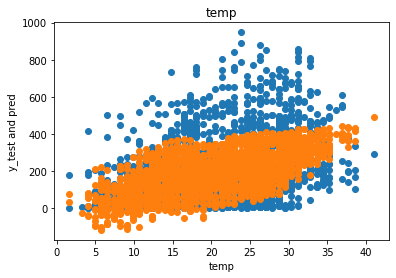

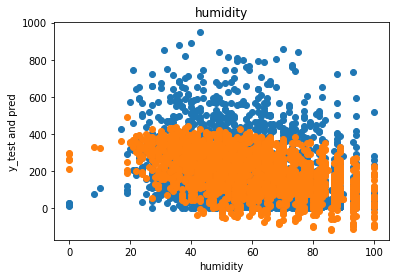

In [14]:
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], y_pred)
plt.xlabel('temp')
plt.ylabel('y_test and pred')
plt.title('temp')
plt.show()
plt.scatter(X_test['humidity'], y_test)
plt.scatter(X_test['humidity'], y_pred)
plt.xlabel('humidity')
plt.ylabel('y_test and pred')
plt.title('humidity')
plt.show()

y_test가 정규분포를 따르는지 확인해볼 필요 있음.<br>
따르지 않는다면 정규분포로 바꿔줘야 함.<br>
1차 방정식이 아닌 다른 식을 고려할 수도 있음. 하지만 모델 복잡도가 올라가므로 추천하지는 않음.

회귀분석에 대한 복습이 되서 좋았음.